In [70]:
import numpy as np
import math
import matplotlib.pyplot as plt

### 1(b)

In [37]:
# Define the matrix A_k
def A_k(k):
    mat = np.zeros((10, 10))
    # We add 1 to i,j while doing calculation since
    # in python they are zero-indexed but in matrix 
    # calculation they are 1-indexed
    for j in range(10):
        for i in range(j):
            val = np.exp((i+1) / (j+1)) * math.cos((i+1) * (j+1)) * math.sin(k)
            mat[i][j] = val
            mat[j][i] = val
    for i in range(10):
        mat[i][i] = ((i+1) / 10) * abs(math.sin(k))
        for j in range(10):
            if (j != i):
                mat[i][i] += abs(mat[i][j])
    
    return mat
        

In [51]:
# Define the vector b_k
def b_k(k):
    vec = np.zeros(10)
    for i in range(10):
        vec[i] = np.exp((i+1) / k) * math.sin((i+1) * k)
    return vec

In [52]:
# Define the functin h_k(x) = x^TA_kx -b_k^Tx
def h(k):
    return lambda x: x.T @ A_k(k) @ x - b_k(k).T @ x
    

In [53]:
# Define the function f(x) = max h_k(x)
def f(x):
    return max([h(k)(x) for k in range(1, 6)])

In [91]:
x0 = np.ones(10)
f(x0)

5337.066429311362

In [59]:
def subgradient(x):
    k_star = 0
    cur_max = -np.inf
    for k in range(1, 6):
        if h(k)(x) >= cur_max:
            cur_max = h(k)(x)
            k_star = k
    return 2 * A_k(k_star) @ x - b_k(k_star)

In [82]:
def subgradient_descent(f, x_init, T, C):
    x_t = x_init
    t = 1
    best_x_lst = [x_init]
    best_x = x_init
    cur_min = np.inf
    while t < T + 1:
        subgrad = subgradient(x_t)
        x_t = x_t - (C / math.sqrt(t)) * subgrad / np.linalg.norm(subgrad)
        if f(x_t) < cur_min:
            best_x = x_t
            cur_min = f(x_t)
        best_x_lst.append(best_x)
        t = t + 1
        if (t % 1000 == 0):
            print(t)
    return best_x_lst, cur_min
    

### Find minimum empirically using subgradient descent
We empirically find the minimun using subgradient descent. If the output of the algorithm does not change much over a large number of iterations, then we are very close to the minimum. 

In [83]:
_, minimum1 = subgradient_descent(f, x0, 100, 1)
minimum1

-0.3353943485890285

In [84]:
_, minimum2 = subgradient_descent(f, x0, 1000, 1)
minimum2

1000


-0.8197470048340905

In [85]:
_, minimum3 = subgradient_descent(f, x0, 10000, 1)
minimum3

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


-0.8364036022719448

In [86]:
_, minimum3 = subgradient_descent(f, x0, 20000, 1)
minimum3

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000


-0.8366982183745468

Based on the calculation above, we see that the output of the algorithm does not change much over 10000 extra iterations. Since the function is convex, we can conclude taht the minimum is roughly -0.84.

In [87]:
# Set the empirical minimum
empirical_min = -0.84

In [109]:
def plot_log_log(x_init, T, C):
    x_lst, _ = subgradient_descent(f, x_init, T, C)
    diff_lst = [f(x) - empirical_min for x in x_lst]
    log_diff_lst = [np.log(diff) for diff in diff_lst]
    T_lst = [np.log(i) for i in range(T + 1)]
    
    plt.title("Stepsize C/sqrt(T): log(T) vs log(suboptimality gap), when T = "\
              + str(T) + ", C = " + str(C))
    plt.xlabel("log(T)")
    plt.ylabel("log(Suboptimality)")
    plt.plot(T_lst, log_diff_lst)

    

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


/tmp/ipykernel_24/2663795671.py:5: RuntimeWarning: divide by zero encountered in log
  T_lst = [np.log(i) for i in range(T + 1)]


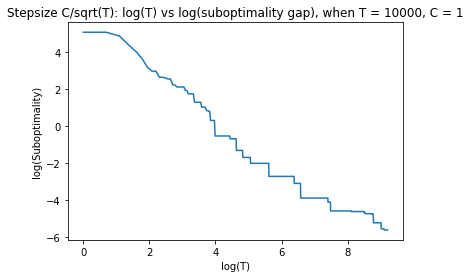

In [112]:
plot_log_log(x0, 10000, 1)

### 1(c)

In [105]:
def subgradient_descent_polyak(f, x_init, T):
    x_t = x_init
    t = 1
    best_x_lst = [x_init]
    best_x = x_init
    cur_min = np.inf
    while t < T + 1:
        subgrad = subgradient(x_t)
        x_t = x_t - ((f(x_t) - empirical_min) / np.linalg.norm(subgrad)) * subgrad / np.linalg.norm(subgrad)
        if f(x_t) < cur_min:
            best_x = x_t
            cur_min = f(x_t)
        best_x_lst.append(best_x)
        t = t + 1
        if (t % 1000 == 0):
            print(t)
    return best_x_lst, cur_min
    

In [106]:
def plot_log_log_polyak(x_init, T):
    x_lst, _ = subgradient_descent_polyak(f, x_init, T)
    diff_lst = [f(x) - empirical_min for x in x_lst]
    log_diff_lst = [np.log(diff) for diff in diff_lst]
    T_lst = [np.log(i) for i in range(T + 1)]
    
    plt.title("Polyak stepsize: log(T) vs log(suboptimality gap), when T = " + str(T))
    plt.xlabel("log(T)")
    plt.ylabel("log(Suboptimality)")
    plt.plot(T_lst, log_diff_lst)

    

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


/tmp/ipykernel_24/1398204827.py:5: RuntimeWarning: divide by zero encountered in log
  T_lst = [np.log(i) for i in range(T + 1)]


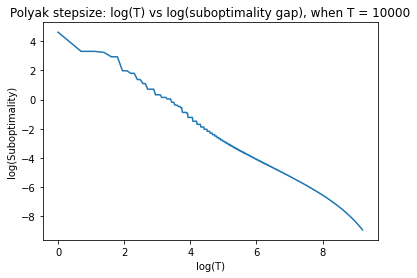

In [108]:
plot_log_log_polyak(x0, 10000)